In [ ]:
#ML PROJECT

# Project:- Churn Prediction of Telecom customers based on their historical data.

# Project Objective: Customer Churn Prediction
The objective of this project is to develop a machine learning model that predicts customer churn based on historical data. 

By analyzing customer behavior, demographics, and engagement metrics, the model aims to identify patterns leading to churn. 

This will help businesses implement proactive retention strategies, optimize marketing efforts, and improve customer satisfaction.

# Problem Statement
Customer churn is a critical issue for businesses, as losing customers impacts revenue and growth. 

Traditional churn detection methods are often reactive, leading to delayed interventions. 

This project aims to build a predictive model that identifies customers likely to churn based on features such as usage patterns, transaction history, customer service interactions, and subscription details.

By leveraging machine learning, businesses can take early action to retain at-risk customers, thereby reducing churn rates and improving customer lifetime value.

# Features Explanation

gender: Whether the customer is a male or a female

SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)

Partner: Whether the customer has a partner or not (Yes, No)

Dependents: Whether the customer has dependents or not (Yes, No)

tenure: Number of months the customer has stayed with the company

PhoneService: Whether the customer has a phone service or not (Yes, No)

MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)

InternetService: Customer’s internet service provider (DSL, Fiber optic, No)

OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)

OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)

DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)

StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)

Contract: The contract term of the customer (Month-to-month, One year, Two year)

PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)

PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card

MonthlyCharges: The amount charged to the customer monthly

TotalCharges: The total amount charged to the customer

Churn: Whether the customer churned or not (Yes or No)

In [3]:
import pandas as pd         # importing important Library
import numpy as np
pd.set_option('display.max_columns',None)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.model_selection import train_test_split, KFold,StratifiedKFold,GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,accuracy_score,confusion_matrix,classification_report,recall_score,precision_score, f1_score,roc_curve,roc_auc_score,auc
import streamlit as st
import joblib
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv(r"C:\Users\shivam srivastava\Desktop\internship\CHURN PREDICTION\WA_Fn-UseC_-Telco-Customer-Churn.csv")   # load data

In [5]:
df.head()   # display top 5 rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df['SeniorCitizen'].unique()  # unique values in senior citizen

array([0, 1], dtype=int64)

In [7]:
df.shape   # size of data set

(7043, 21)

In [8]:
df.isnull().sum()     # checking null values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.dtypes            # dataTypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
df.info()            # information about datatype and null vales for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df.describe()    # description about data

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Step 1. Data Preprocessing:

In [12]:
df['TotalCharges'].unique()   # checking values present in Total charges as it is object but should be intweger

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [13]:
# Converting 'TotalCharges' to numeric, handling errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Replace NaN values with the median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [14]:
df['TotalCharges'].dtypes      # checking again its datatype which is float now

dtype('float64')

In [15]:
df=df.drop(columns='customerID',axis=1)    # dropping customerid

In [16]:
df.dtypes     # again checking data types

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [17]:
categorical=df.select_dtypes(include='object').columns.to_list()    # categorical columns
categorical

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [18]:
numerical=df.select_dtypes(include=('int64','float64')).columns.to_list()   # numerical columns
numerical

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [19]:
# Separate features and target
x = df.drop('Churn', axis=1)
y = df['Churn']

In [20]:
# Separate categorical and numerical features

categorical = x.select_dtypes(include='object').columns.to_list()

numerical = x.select_dtypes(include=('int64', 'float64')).columns.to_list()

In [21]:
# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Scaling and Encoding

In [22]:
# Preprocessing: Scaling numerical data and encoding categorical data
scaler = StandardScaler()
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# Fit and transform numerical data
x_train_scaled = scaler.fit_transform(x_train[numerical])
x_test_scaled = scaler.transform(x_test[numerical])

# Transform categorical data
x_train_encoded = encoder.fit_transform(x_train[categorical])
x_test_encoded = encoder.transform(x_test[categorical])


In [23]:

# # Combine the scaled numerical features with encoded categorical features
# x_train_final = np.hstack([x_train_scaled, x_train_encoded])
# x_test_final = np.hstack([x_test_scaled, x_test_encoded])

In [24]:
#  Convert Encoded Features to DataFrame
x_train_cat_df = pd.DataFrame(x_train_encoded, columns=encoder.get_feature_names_out(categorical))
x_test_cat_df = pd.DataFrame(x_test_encoded, columns=encoder.get_feature_names_out(categorical))


In [25]:
# Combine the scaled numerical features with encoded categorical features
x_train_final = pd.concat([pd.DataFrame(x_train_scaled, columns=numerical), x_train_cat_df], axis=1)
x_test_final = pd.concat([pd.DataFrame(x_test_scaled, columns=numerical), x_test_cat_df], axis=1)

In [26]:

# Train the model
model = LogisticRegression(random_state=42)
model.fit(x_train_final, y_train)

LogisticRegression(random_state=42)

# Step 2. Exploratory Data Analysis(EDA)

In [27]:
            # checking outlier in all the columns

df_num=df.select_dtypes(include='number')
for i in df_num:
    q1=df_num[i].quantile(0.25)
    q3=df_num[i].quantile(0.75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    if df_num[df_num[i]>upper].any(axis=None):
       df_num.loc[df[i]>upper,i]=upper

    if df_num[df_num[i]<lower].any(axis=None):
        df_num.loc[df[i]<lower,i]=lower

    else:
        print(i,'No')

SeniorCitizen No
tenure No
MonthlyCharges No
TotalCharges No


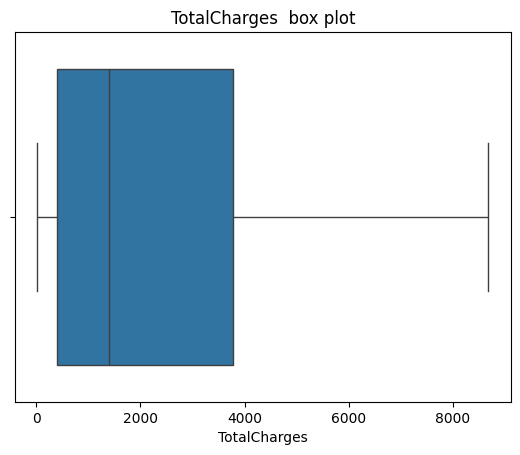

In [28]:
sns.boxplot(x=df['TotalCharges'])
plt.title("TotalCharges  box plot")
plt.show()

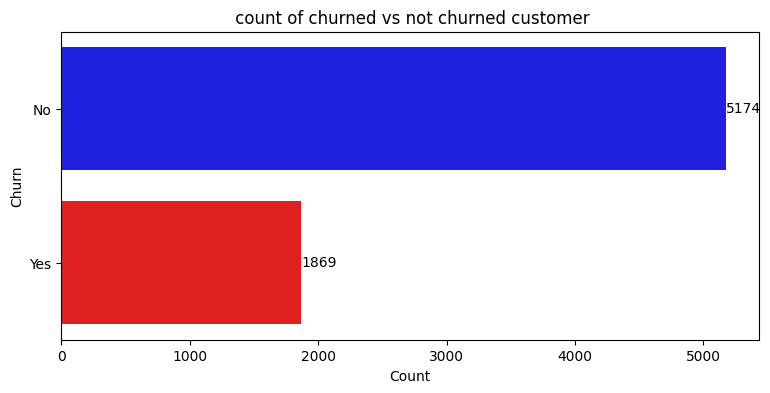

In [34]:
 #bar plot showing the count of  churned vs not churned customer
plt.figure(figsize=(9,4))
ax=sns.countplot(y='Churn', data=df,palette=['blue', 'red'])
for container in ax.containers:
    ax.bar_label(container, fmt='%d')   # in integer format
plt.title(" count of churned vs not churned customer")
plt.ylabel("Churn")
plt.xlabel("Count")
plt.show()


Result:- 1869 are churned customers while 5174 customers are not churned

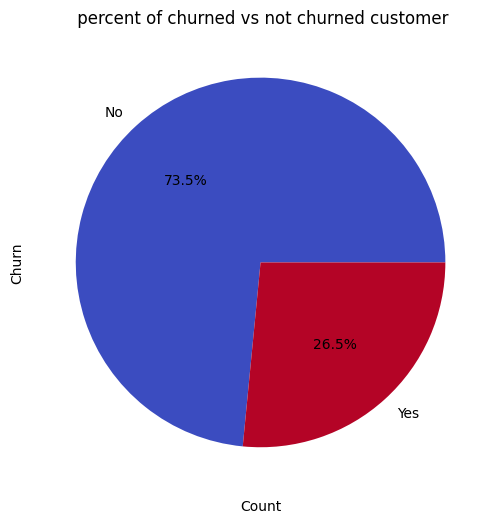

In [75]:
plt.figure(figsize=(6,6))
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%', cmap='coolwarm')
plt.title(" percent of churned vs not churned customer")
plt.ylabel("Churn")
plt.xlabel("Count")
plt.show()


Result:- 26.5% are churned customers while 73.5%  customers are not churned

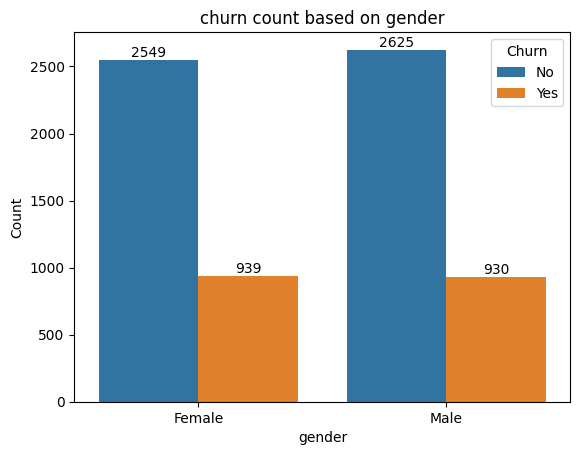

In [36]:
ax=sns.countplot(x='gender', hue='Churn', data=df)
for container in ax.containers:
    ax.bar_label(container, fmt='%d')   # in integer format
plt.title("churn count based on gender")
plt.ylabel("Count")
plt.xlabel("gender")
plt.show()


Result:-  2625 Males > 2549 Females not churned  while 930 Male  and 939 Female  are churned

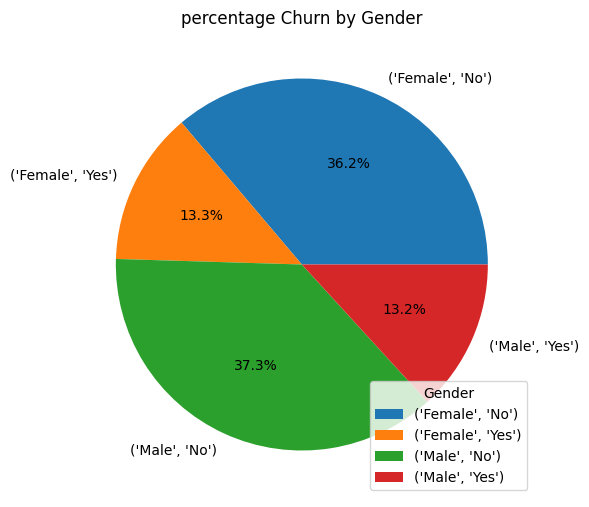

In [89]:
plt.figure(figsize=(6,8))
nd=df.groupby("gender")["Churn"].value_counts()
plt.pie(nd,labels=nd.index,autopct='%1.1f%%')
plt.title("percentage Churn by Gender")
plt.legend(nd.index, title="Gender", loc="lower right")
plt.show()

Result :-  out of 100% ,  13.3% female and 13.2% female are churned

<Figure size 400x800 with 0 Axes>

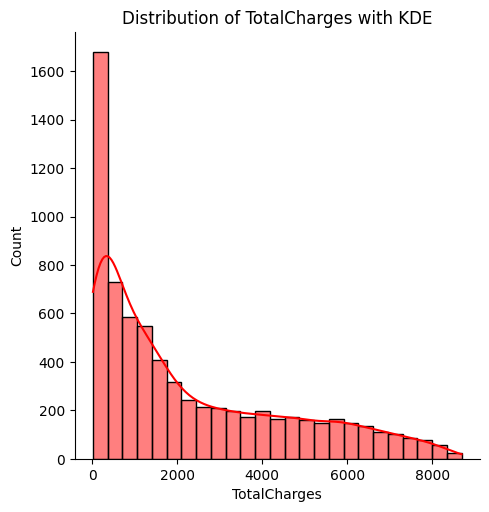

In [178]:
plt.figure(figsize=(4,8))
sns.displot(df['TotalCharges'],kde=True,color='r')
plt.title("Distribution of TotalCharges with KDE")
plt.show()

Result:-  with high Totalcharges plans no. of customers connected are less . very less Totalcharge plans customers are large in number.

<Figure size 400x800 with 0 Axes>

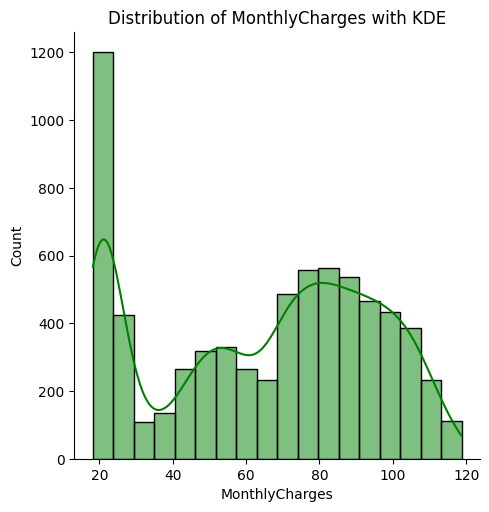

In [180]:
plt.figure(figsize=(4,8))
sns.displot(df['MonthlyCharges'],kde=True,color='g')
plt.title("Distribution of MonthlyCharges with KDE")
plt.show()

Result:-  1200 customers are connected with starting  plan of $20 . customers with plan of $70 to $90 are prefering more people

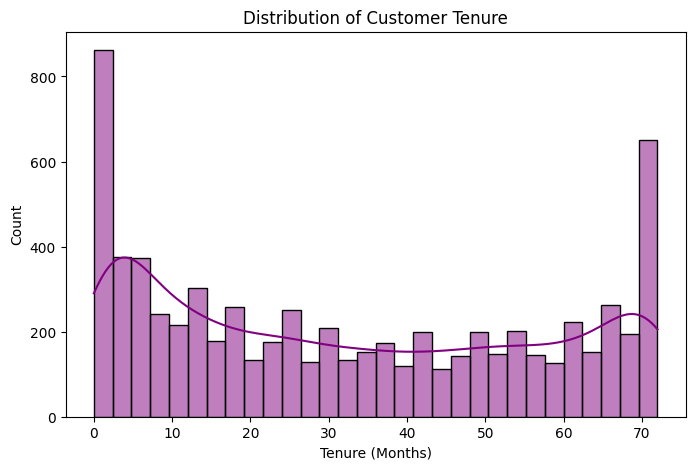

In [27]:
plt.figure(figsize=(8, 5))
sns.histplot(df['tenure'], bins=30, kde=True, color='purple')
plt.title("Distribution of Customer Tenure")
plt.xlabel("Tenure (Months)")
plt.ylabel("Count")
plt.show()


Result:- tells how long customers have stayed with the telecom company in months
A sharp peak at 0-5 months, meaning a large number of customers leave soon after joining.
Possible reasons:
Poor onboarding experience.
Better offers from competitors.
Dissatisfaction with service quality.

Customers with tenure between 10-60 months are more evenly spread, but fewer than new or long-term customers.

peak at 70+ months  shows a group of customers is highly loyal, staying with the company for a long time.
Possible reasons:
Long-term contracts.
Satisfied customers.
Loyalty benefits or discounts for long-term users.

Insights for Churn Prediction & Business Strategy
Early churn is a major issue : Focus on improving customer retention within the first few months.
Long-term loyalty programs work : The company may already have good incentives for long-term customers.


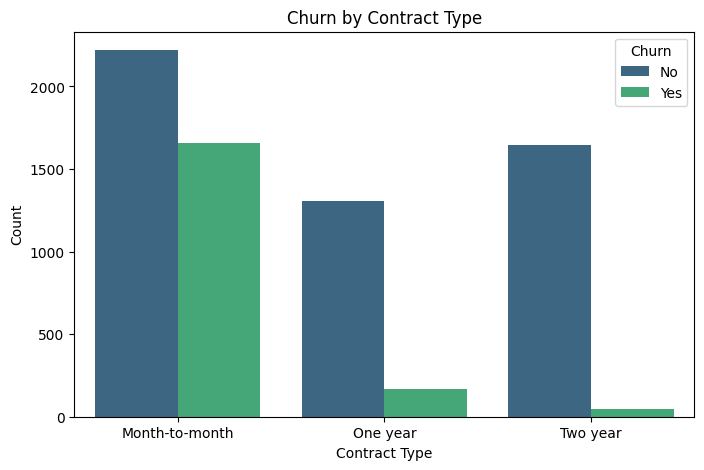

In [77]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Contract', hue='Churn', palette='viridis')
plt.title("Churn by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.show()


Result:- Long term plan users do not churned while churned customers are high with month to month plan . 

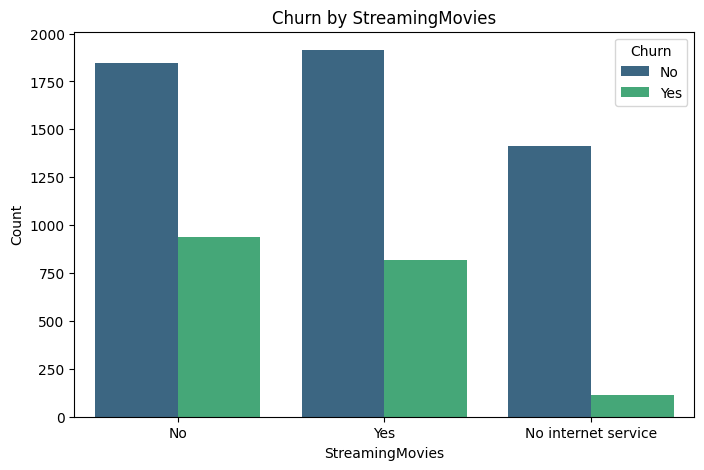

In [41]:

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='StreamingMovies', hue='Churn', palette='viridis')
plt.title("Churn by StreamingMovies")
plt.xlabel("StreamingMovies")
plt.ylabel("Count")
plt.show()


Result :- Those who are not streaming movies are more getting churned

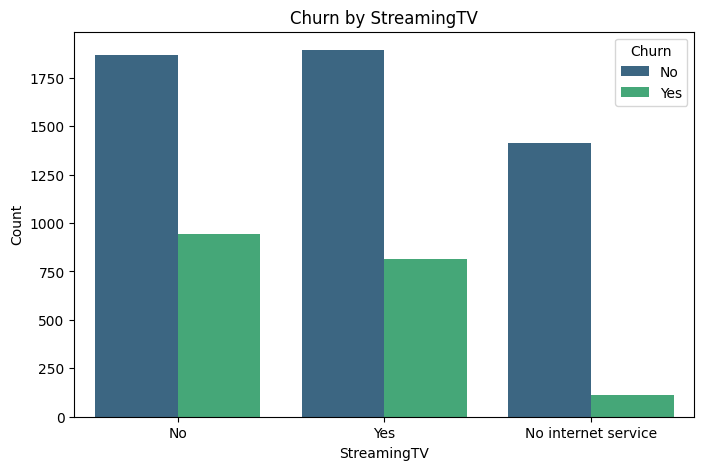

In [42]:

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='StreamingTV', hue='Churn', palette='viridis')
plt.title("Churn by StreamingTV")
plt.xlabel("StreamingTV")
plt.ylabel("Count")
plt.show()

Result :- Those who are not streaming Tv are more getting churned

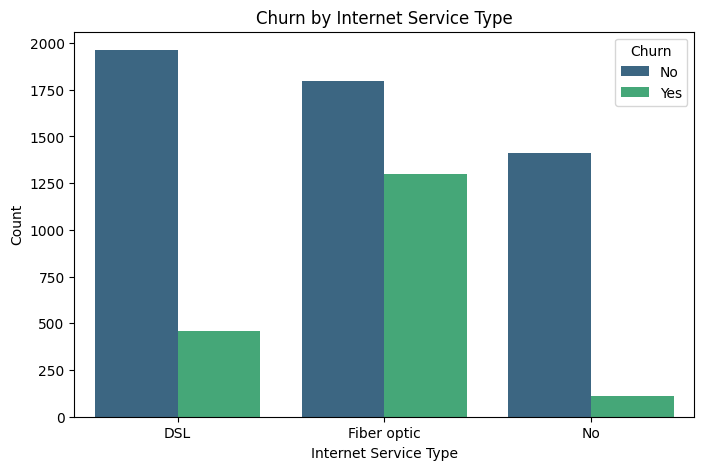

In [65]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='InternetService', hue='Churn', palette='viridis')
plt.title("Churn by Internet Service Type")
plt.xlabel("Internet Service Type")
plt.ylabel("Count")
plt.show()


Result:- Fiber Optic Has the Highest Churn Rate

A large number of Fiber Optic users have churned compared to other service types.
Possible reasons:
Higher pricing for fiber-optic plans.
Service quality issues (e.g., frequent disconnections).
Competition from other high-speed internet providers.

Customers Without Internet Service Have the Lowest Churn

The "No Internet" group has the lowest churn.
This suggests that customers who only use phone services are more loyal.
Possible reasons:
They may have long-term contracts.
They may be less dependent on high-speed internet.

Business Strategy & Recommendations:- 
1. Improve Fiber Optic Customer Retention

2. Since fiber-optic users churn the most, investigate their pain points.
Offer better pricing, discounts, or improved service quality to reduce churn.


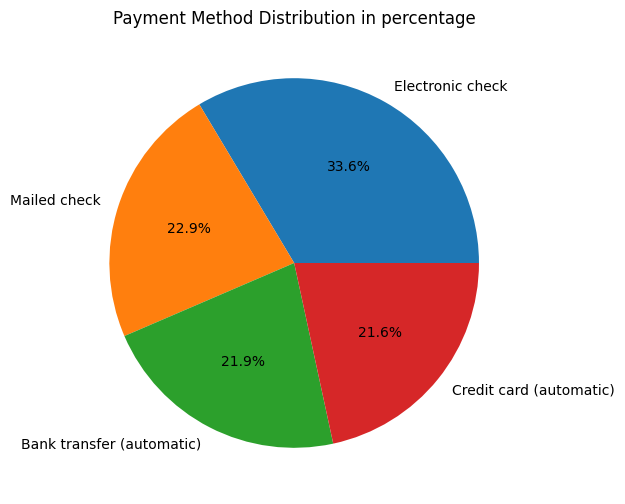

In [37]:
plt.figure(figsize=(8,6))
df['PaymentMethod'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Payment Method Distribution in percentage')
plt.ylabel('')
plt.show()

Result:- users of  payment method is highest for  Electronic check 

Possible Reasons Why Electronic Check is the Most Used Payment Method
1. Default or Traditional Payment Option

2. Possible Promotions or Discounts

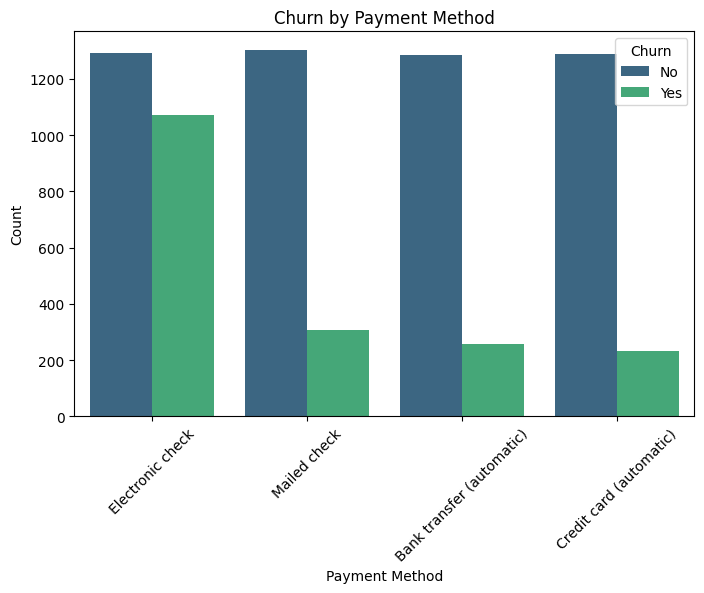

In [197]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette='viridis')
plt.xticks(rotation=45)
plt.title("Churn by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.show()


Result:-  Electronic Check category has the highest number of churned customers.
Possible reasons:
Electronic check users may be less engaged with automatic payments.
They may find the billing process inconvenient.
They may be more price-sensitive or switch providers often.

Customers using Bank Transfer (automatic) and Credit Card (automatic) have much lower churn rates.
This suggests that automatic payments help retain customers.
Possible reasons:
Automatic payments reduce the effort required for bill payments.

Business Strategy & Recommendations:-
1. Encourage automatic payments
2. Since automatic payment users have lower churn, telecom companies can offer discounts or incentives for switching to automatic payments.
Investigate electronic check user dissatisfaction

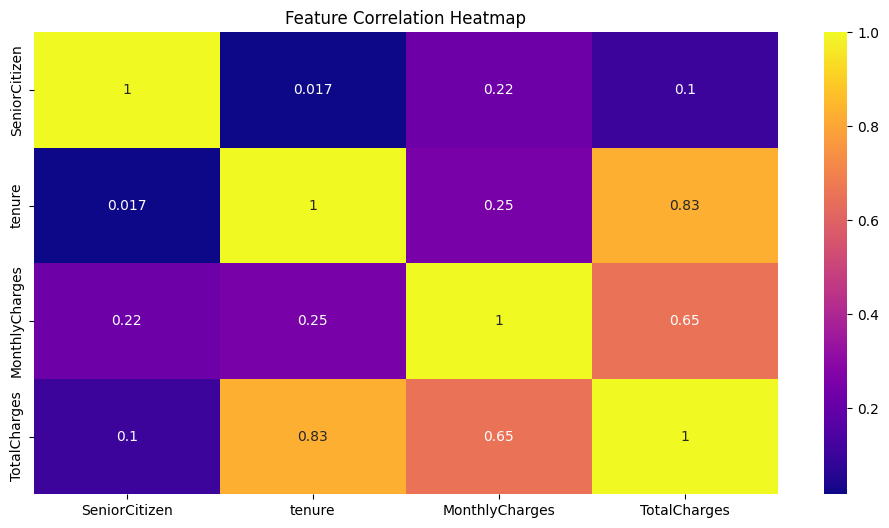

In [97]:
plt.figure(figsize=(12,6))
sns.heatmap(df.select_dtypes(include=('int64','float64')).corr(method='pearson'),annot=True,cmap='plasma')
plt.title("Feature Correlation Heatmap")
plt.show()

Explaination:-Helps identify relationships between numerical features and churn. High correlation may indicate strong predictive power.
Tenure & TotalCharges (0.83 - Strong Positive Correlation)
TotalCharges and tenure are highly related, meaning customers who have stayed longer have naturally paid more.
MonthlyCharges is moderately correlated with TotalCharges, so high monthly fees might be an influencing factor in churn.
Senior citizen status has weak correlations with tenure, meaning it may not be a strong predictor of churn alone as
simply being a senior citizen does not strongly influence how long a customer stays or how much they are charged.

In [158]:
# Extract Feature Importance
feature_importance = pd.Series(model.coef_[0], index=x_train_final.columns).sort_values(ascending=False)

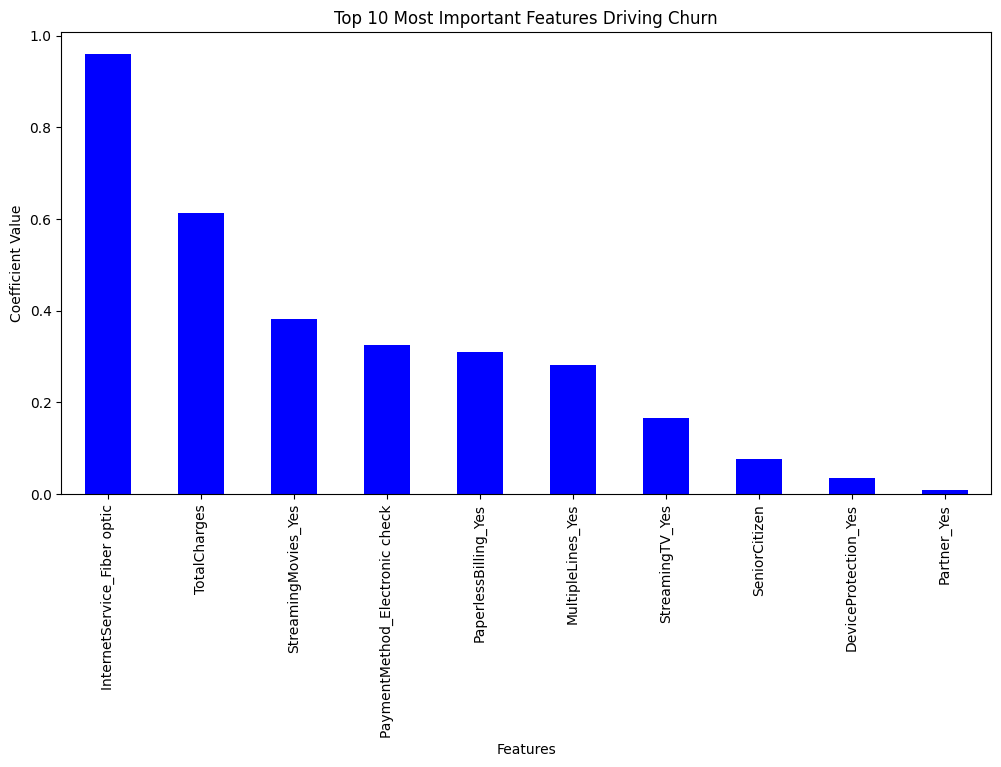

Top 10 Most Important Features:
InternetService_Fiber optic       0.959365
TotalCharges                      0.613580
StreamingMovies_Yes               0.382639
PaymentMethod_Electronic check    0.324857
PaperlessBilling_Yes              0.310896
MultipleLines_Yes                 0.282023
StreamingTV_Yes                   0.166315
SeniorCitizen                     0.076093
DeviceProtection_Yes              0.034864
Partner_Yes                       0.009792
dtype: float64


In [177]:
# Plot Feature Importance
plt.figure(figsize=(12, 6))
feature_importance[:10].plot(kind="bar", color="blue")
plt.title("Top 10 Most Important Features Driving Churn")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.show()

# Display Top 10 Features
print("Top 10 Most Important Features:")
print(feature_importance[:10])

# Conclusion from EDA

Customers with month-to-month contracts churn the most.

Fiber optic users churn more compared to DSL.

Electronic check payment method has a high churn rate.

Longer tenure customers are less likely to churn.

Higher monthly charges may be linked to churn.

# Step 3. Model Selection:

In [162]:
# Train the model Logistic Regression
model1 = LogisticRegression(random_state=42)
model1.fit(x_train_final, y_train)


LogisticRegression(random_state=42)

In [165]:
y_pred_log=model1.predict(x_test_final)    # Model PREDICTION
accuracy_log=accuracy_score(y_test,y_pred_log)
accuracy_log

0.812588736393753

In [166]:
model2=DecisionTreeClassifier()   # training model DecisionTree
model2.fit(x_train_final,y_train)

y_pred_tree=model2.predict(x_test_final)

accuracy_tree=accuracy_score(y_test,y_pred_tree)
accuracy_tree

0.7373402744912447

In [167]:
model3=RandomForestClassifier()    # training model Randomforest
model3.fit(x_train_final,y_train)

y_pred_random_forest=model3.predict(x_test_final)

accuracy_random_forest=accuracy_score(y_test,y_pred_random_forest)
accuracy_random_forest

0.7979176526265973

In [168]:
from sklearn.svm import SVC
model4=SVC()
model4.fit(x_train_final,y_train)

y_pred_svc=model4.predict(x_test_final)

accuracy_svc=accuracy_score(y_test,y_pred_svc)
accuracy_svc

0.8007572172266919

In [193]:
from sklearn.ensemble import AdaBoostClassifier 
adaboost = AdaBoostClassifier()
adaboost.fit(x_train_final,y_train)
ada_pred = adaboost.predict(x_test_final)

print(f"AdaBoost Accuracy : {accuracy_score(y_test, ada_pred)}")

AdaBoost Accuracy : 0.7993374349266446


In [42]:
# Define the combined models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Classifier': SVC(probability=True)
}


# Train and evaluate each model
for name, model in models.items():
    model.fit(x_train_final, y_train)
    y_pred = model.predict(x_test_final)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred)}")


Logistic Regression Accuracy: 0.812588736393753
Decision Tree Accuracy: 0.735447231424515
Random Forest Accuracy: 0.7941315664931378
Support Vector Classifier Accuracy: 0.8007572172266919


# 3(b). Hyper parameter tuning

In [169]:

# Define your parameter grids
param_grids = {
    "Logistic Regression": {'C': [0.1, 1, 5,20,50,100], 'solver': ['lbfgs', 'liblinear']},
    "Support Vector Classifier": {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    "Decision Tree": {'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10]},
    "Random Forest": {'n_estimators': [50, 100], 'max_depth': [10, 15], 'min_samples_split': [2, 5]}

}

# Initialize an empty list for results
best_params_results = {}

# Loop through each model and perform Grid Search
for model_name, model_instance in models.items():
    param_grid = param_grids[model_name]

    grid_search = GridSearchCV(model_instance, param_grid, cv=10, scoring='accuracy',n_jobs=-1)
    grid_search.fit(x_train_final, y_train)

    best_params_results[model_name] = grid_search.best_params_
    print(f"Best Hyperparameters for {model_name}:", grid_search.best_params_)



Best Hyperparameters for Logistic Regression: {'C': 0.1, 'solver': 'lbfgs'}
Best Hyperparameters for Decision Tree: {'max_depth': 5, 'min_samples_split': 2}
Best Hyperparameters for Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best Hyperparameters for Support Vector Classifier: {'C': 1, 'kernel': 'linear'}


In [170]:
# Model Accuracy after hypertuning parameters are provided
models = {
    'Logistic Regression': LogisticRegression(C= 0.1, solver= 'lbfgs'),
    'Decision Tree': DecisionTreeClassifier(max_depth= 5, min_samples_split=2),
    'Random Forest': RandomForestClassifier(max_depth= 10, min_samples_split= 5, n_estimators= 100),
    'Support Vector Classifier': SVC(C= 1, kernel= 'linear')
}

# Train and evaluate each model
best_model = None
best_score = 0
best_model_name=''
for name, model in models.items():
    model.fit(x_train_final, y_train)
    y_pred = model.predict(x_test_final)
    accuracy=accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred)}")

     # Select best model based on RMSE
    if best_score < accuracy:
        best_score = accuracy
        best_model = model
        best_model_name=name

print(f"\n Best Selected Model based on accuracy: {best_model_name}")



Logistic Regression Accuracy: 0.8111689540937056
Decision Tree Accuracy: 0.7893989588263133
Random Forest Accuracy: 0.8035967818267865
Support Vector Classifier Accuracy: 0.8054898248935163

 Best Selected Model based on accuracy: Logistic Regression


 #  Step 4. Model Evaluation:

Logistic Regression Evaluation Metrics:
Accuracy: 0.8112
Precision: 0.6882
Recall: 0.5575
F1-Score: 0.6160



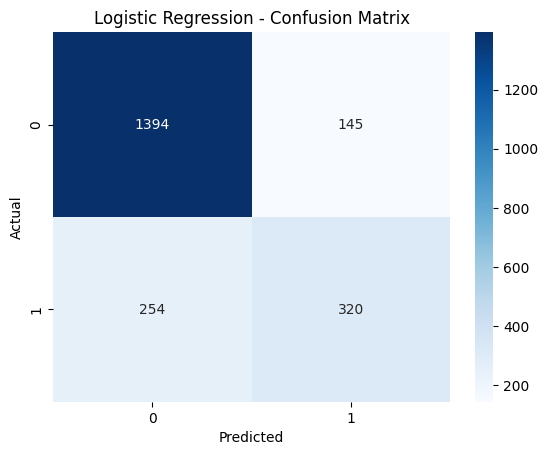

Decision Tree Evaluation Metrics:
Accuracy: 0.7894
Precision: 0.6146
Recall: 0.6028
F1-Score: 0.6086



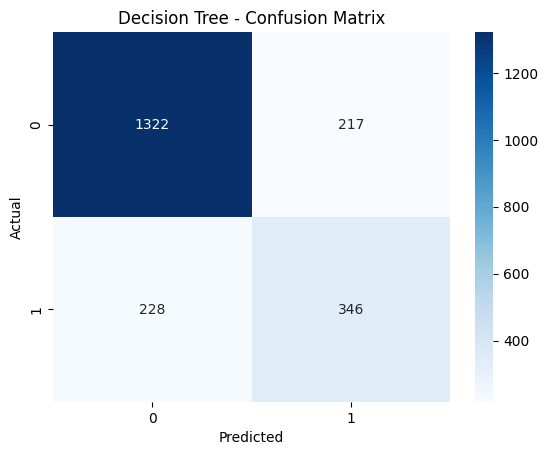

Random Forest Evaluation Metrics:
Accuracy: 0.8041
Precision: 0.6843
Recall: 0.5174
F1-Score: 0.5893



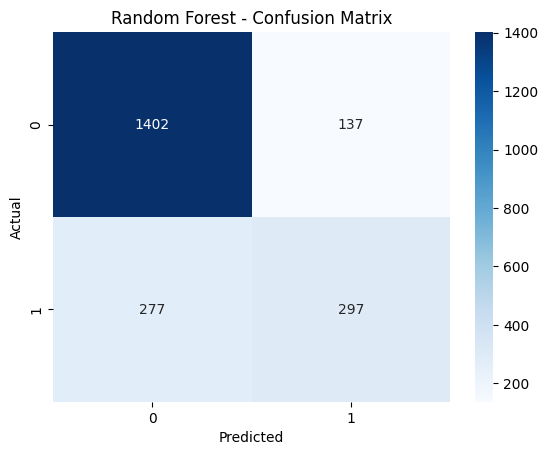

Support Vector Classifier Evaluation Metrics:
Accuracy: 0.8055
Precision: 0.6701
Recall: 0.5592
F1-Score: 0.6097



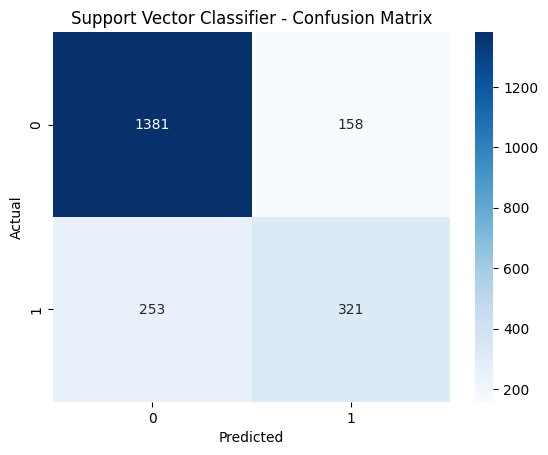

In [171]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Function to evaluate and display all metrics for each model
def evaluate_model(name, model, x_test_final, y_test):
    # Predict and evaluate
    y_pred = model.predict(x_test_final)
    

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='Yes')  # Adjust pos_label based on  target variable, 1 taken as encoded previously
    recall = recall_score(y_test, y_pred, pos_label='Yes')
    f1 = f1_score(y_test, y_pred, pos_label='Yes')

    # Display metrics
    print(f"{name} Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}\n")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Train and evaluate each model
for name, model in models.items():
    model.fit(x_train_final, y_train)
    evaluate_model(name, model, x_test_final, y_test)


# Step 5. Deployment

In [173]:
# Save the model and preprocessing objects
joblib.dump(model, 'Churn Prediction.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(encoder, 'encoders.pkl')

print("Model trained and saved successfully.")


Model trained and saved successfully.


In [38]:
%%writefile appnew601.py

import joblib                 
import numpy as np
import streamlit as st
import pandas as pd

# Load the trained model and preprocessing objects
model = joblib.load('Churn Prediction.pkl')
scaler = joblib.load('scaler.pkl')
encoder = joblib.load('encoders.pkl')

# Streamlit app title
st.title("Customer Churn Prediction")
st.write("Enter customer details to predict the likelihood of churn.")


def user_input_features():
    gender = st.sidebar.selectbox("Gender", ["Male", "Female"], key="gender")
    SeniorCitizen = st.sidebar.selectbox("SeniorCitizen", [0, 1], key="Senior_citizen", format_func=lambda x: "Yes" if x == 1 else "No")
    Partner = st.sidebar.radio("Partner", ["Yes", "No"], key="partner")
    Dependents = st.sidebar.radio("Dependents", ["Yes", "No"], key="dependents")
    tenure = st.sidebar.slider("Tenure (months)", 0, 72, 24, key="tenure")
    PhoneService = st.sidebar.radio("Phone Service", ["Yes", "No"], key="phone_service")
    MultipleLines = st.sidebar.selectbox("Multiple Lines", ["No phone service", "No", "Yes"], key="multiple_lines")
    InternetService = st.sidebar.selectbox("Internet Service", ["DSL", "No", "Fiber optic"], key="internet_service")
    OnlineSecurity = st.sidebar.selectbox("Online Security", ["Yes", "No", "No internet service"], key="online_security")
    OnlineBackup = st.sidebar.selectbox("Online Backup", ["Yes", "No", "No internet service"], key="online_backup")
    DeviceProtection = st.sidebar.selectbox("Device Protection", ["Yes", "No", "No internet service"], key="device_protection")
    TechSupport = st.sidebar.selectbox("Tech Support", ["Yes", "No", "No internet service"], key="tech_support")
    StreamingTV = st.sidebar.selectbox("Streaming TV", ["Yes", "No", "No internet service"], key="streaming_tv")
    StreamingMovies = st.sidebar.selectbox("Streaming Movies", ["Yes", "No", "No internet service"], key="streaming_movies")
    Contract = st.sidebar.selectbox("Contract Type", ["Month-to-month", "One year", "Two year"], key="contract")
    PaperlessBilling = st.sidebar.radio("Paperless Billing", ["Yes", "No"], key="paperless_billing")
    PaymentMethod = st.sidebar.selectbox("Payment Method", ["Electronic check", "Mailed check", "Bank transfer", "Credit card"], key="payment_method")
    MonthlyCharges = st.sidebar.slider("Monthly Charges", 10, 120, 50, key="monthly_charges")
    TotalCharges = st.sidebar.slider("TotalCharges", 0, 8000, 2000, key="total_charges")

    # Store user inputs in a DataFrame
    data = {
        "gender": gender,
        "SeniorCitizen": SeniorCitizen,
        "Partner": Partner,
        "Dependents": Dependents,
        "tenure": tenure,
        "PhoneService": PhoneService,
        "MultipleLines": MultipleLines,
        "InternetService": InternetService,
        "OnlineSecurity": OnlineSecurity,
        "OnlineBackup": OnlineBackup,
        "DeviceProtection": DeviceProtection,
        "TechSupport": TechSupport,
        "StreamingTV": StreamingTV,
        "StreamingMovies": StreamingMovies,
        "Contract": Contract,
        "PaperlessBilling": PaperlessBilling,
        "PaymentMethod": PaymentMethod,
        "MonthlyCharges": MonthlyCharges,
        "TotalCharges": TotalCharges
    }
    
    return pd.DataFrame([data])


# Get user input
input_data = user_input_features()

# Show user input
st.subheader("Customer Data Preview")
st.write(input_data)

# Data preprocessing before prediction
def preprocess_data(df):
    """Ensure features match the trained model's expected format."""
    
    # Features used during model training
    expected_features = ["gender", "SeniorCitizen", "Partner", "Dependents", "tenure", 
                         "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", 
                         "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", 
                         "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod", 
                         "MonthlyCharges","TotalCharges"]  
    
    # Ensuring only the expected features are included
    df = df[expected_features]
    
    # Apply scaling to numerical columns
    numerical_features = ["SeniorCitizen","tenure", "MonthlyCharges","TotalCharges"]
    
    # Ensure all numerical features exist before scaling
    if set(numerical_features).issubset(df.columns):
        df[numerical_features] = scaler.transform(df[numerical_features])

    # Encode categorical features
    categorical_features = ["gender", "Partner", "Dependents", "PhoneService", "MultipleLines", 
                            "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", 
                            "TechSupport", "StreamingTV", "StreamingMovies", "Contract", 
                            "PaperlessBilling", "PaymentMethod"]
    
    df_categorical = encoder.transform(df[categorical_features])
    
    # Convert encoded categories to DataFrame
    df_categorical = pd.DataFrame(df_categorical, columns=encoder.get_feature_names_out(categorical_features))
    
    # Merge processed numerical and categorical data
    df_processed = pd.concat([df[['SeniorCitizen', 'tenure', 'MonthlyCharges',"TotalCharges"]], df_categorical], axis=1)
    
    return df_processed

# Predict and display result
if st.button("Predict Churn"):
    processed_data = preprocess_data(input_data)
    prediction = model.predict(processed_data)
    st.write("customer is churned :", prediction[0] )
    # result = "Churn" if prediction[0] == 1 else "No Churn"
    
  

Writing appnew601.py



 # Run Streamlit in the background

In [39]:
# Run Streamlit in the background  for jupiter notebook
! streamlit run appnew601.py & npx localtunnel --port 8501

^C
